In [1]:
using DifferentialEquations; using LinearAlgebra; using Plots; gr();
using LaTeXStrings

In [30]:
######################
# Bunch of constants #
######################

# Pi
PIGREEK = 3.141592654;
# hbarc
hbarc = 197.327; # MeV * fm 

# Earth
EarthRadius = 6371.0; #km
EarthDiameter = 2*EarthRadius;

# Compute factor = 2.*sqrt(2) * G_F * Y_e * density * E /m_p
# G_F = 8.92 e-8 GeV fm^3 
# Y_e= 0.5 (this is an assumption!) 
# m_n = 1.672 e-24 g 
# density is given in g/cm^3 
# energy is given in GeV
# distance in Km, mass in grams
# to get right dimensions we compute parammsw = factor/(2 * hbarc * E)
Parammsw=1.9207e-4;

# double Angles (from Koike and Sato!)
t12=31.46/180.0*PIGREEK; #33.0/180.0*PIGREEK;
t13=8.38/180.0*PIGREEK; #asin(sqrt(0.025));
t23 = 38.53/180.0*PIGREEK;#PIGREEK/4.0;
delta=-90.0 / 180.0*PIGREEK;

# Differences in mass squared
dm32=0.00246315;
dm21=7.37e-5;

# Neutrino energy
Enu = 0.6; # GeV

In [31]:
# Fill PMNS Mixing matrix, U

# initialize to 0 (note it is implicitely complex type for all elements!)
U = [0.0+im*0.0 0.0+im*0.0 0.0+im*0.0; 0 0 0 ; 0 0 0 ]

# 3 angles (t12, t13, t23), and the complex phase (delta)
c13 = cos(t13);
s13 = sin(t13);
  
c12 = cos(t12);
s12 = sin(t12);
  
c23 = cos(t23);
s23 = sin(t23);

# e1, e2, e3
U[1,1] = c12*c13 + im*0.0     
U[1,2] = s12*c13 + im*0.0    
U[1,3] = s13*exp(-im*delta)

# mu1, mu2, mu3
U[2,1] = -s12*c23-(c12*s23*s13)*exp(im*delta)
U[2,2] = c12*c23-(s12*s23*s13)*exp(im*delta)
U[2,3] = s23*c13 + im*0.0

#tau1, tau2, tau3
U[3,1] = s12*s23-(c12*c23*s13)*exp(im*delta)
U[3,2] = -c12*s23-(s12*c23*s13)*exp(im*delta)
U[3,3] = c23*c13 + im*0.0

display(U)

# Filling mass squared differences
Mass = [0.0; 0.0; 0.0]
Mass2 = Mass
#Mass[1]=0.0;
#Mass[2]=sqrt(Mass[1]*Mass[1]+dm21);
#Mass[3]=sqrt(Mass[2]*Mass[2]+dm32);
#dm31=Mass[3]*Mass[3]-Mass[1]*Mass[1];
#Mass2[1] = Mass[1]*Mass[1]
#Mass2[2] = Mass[2]*Mass[2]
#Mass2[3] = Mass[3]*Mass[3]
Mass2[1] = 0.0; 
Mass2[2] = 7.37e-5;;
Mass2[3] = Mass2[2] + 0.00246315;
Mmass = [0.0+im*0.0 0.0+im*0.0 0.0+im*0.0; 0 0 0 ; 0 0 0 ]
Mmass[1,1] = Mass2[1] + im*0.0;
Mmass[2,2] = Mass2[2] + im*0.0;
Mmass[3,3] = Mass2[3] + im*0.0;

display(Mmass)



3×3 Array{Complex{Float64},2}:
  0.843897+0.0im         0.516331+0.0im        -2.98913e-11+0.145738im
 -0.408276+0.0774388im    0.66729+0.0473802im      0.616274+0.0im
  0.325106+0.0972494im  -0.531357+0.0595011im       0.77393+0.0im

3×3 Array{Complex{Float64},2}:
 0.0+0.0im      0.0+0.0im         0.0+0.0im
 0.0+0.0im  7.37e-5+0.0im         0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.00253685+0.0im

In [57]:
# Hamiltonian - first for vacuum only

U = broadcast(conj, U)
Udagger = transpose(U)
Udagger = broadcast(conj, Udagger)
#display(Udagger)
H1 = Mmass*Udagger
#display(U)
#display(H1)
H = U*H1
#display(H)
#Base.print_matrix(stdout, H)

p=1.0/(2.0*hbarc*1.0e6*1.0e-18)/Enu/1.0e9 + im*0;
Scale = UniformScaling(p)
Hmat = Scale*H;
#Hmat[1,1]
Base.print_matrix(stdout, Hmat)

   6.21047079477365e-5 - 1.3325780814266197e-30im  2.1447304784874117e-5 - 0.00019092030149148322im  -1.707829933767095e-5 - 0.00023976192441729275im
 2.1447304784874117e-5 + 0.00019092030149148322im  0.0008416320287797116 + 0.0im                     0.0010000599132482847 + 4.038713211740919e-6im
 -1.707829933767095e-5 + 0.00023976192441729275im  0.0010000599132482847 - 4.038713211740918e-6im    0.0013011904484355888 + 0.0im

In [58]:
# The derivatives, for propagating in vacuum
function Eq(du, u, p, t)
    du[1] = Hmat[1,1]*u[1]+ Hmat[1,2]*u[2]+Hmat[1,3]*u[3]
    du[2] = Hmat[2,1]*u[1]+ Hmat[2,2]*u[2]+Hmat[2,3]*u[3]
    du[3] = Hmat[3,1]*u[1]+ Hmat[3,2]*u[2]+Hmat[3,3]*u[3]

    # multiply by -i
    du[1] = du[1]*(0+1.0*im)
    du[2] = du[2]*(0+1.0*im)
    du[3] = du[3]*(0+1.0*im)
end

Eq (generic function with 1 method)

In [34]:
# Initial value, in flavour basis, start with nue
#u0 = [1.0+im*0.0,0.0+im*0.0,0.0+im*0.0]
u0 = [0.0+im*0.0,1.0+im*0.0,0.0+im*0.0]
#tspan = (0.0, EarthRadius)
tspan = (0.0, 1000.0) # km
prob = ODEProblem(Eq,u0,tspan)

ODEProblem with uType Array{Complex{Float64},1} and tType Float64. In-place: true
timespan: (0.0, 1000.0)
u0: Complex{Float64}[0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im]

In [35]:
sol = solve(prob, Tsit5(), adaptive=false, reltol=1e-9, dt=0.05)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 20002-element Array{Float64,1}:
    0.0
    0.05
    0.1
    0.15000000000000002
    0.2
    0.25
    0.3
    0.35
    0.39999999999999997
    0.44999999999999996
    0.49999999999999994
    0.5499999999999999
    0.6
    ⋮
  999.4999999996387
  999.5499999996387
  999.5999999996386
  999.6499999996386
  999.6999999996385
  999.7499999996385
  999.7999999996384
  999.8499999996384
  999.8999999996383
  999.9499999996383
  999.9999999996382
 1000.0
u: 20002-element Array{Array{Complex{Float64},1},1}:
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im]
 [-4.773011479283452e-5 + 5.348943414896949e-6im, 0.9999999454565275 + 0.00021040799746522865im, -1.0780645511355671e-6 + 0.000250014958237489im]
 [-9.546029922232325e-5 + 1.0672121269982533e-5im, 0.9999997818261256 + 0.00042081593655226505im, -2.2929015788737006e-6 + 0.000500029827453031im]
 [-0.00014319053948355984 + 1.5969533575050594e-5im, 0.9999995091088413 + 0.0006312

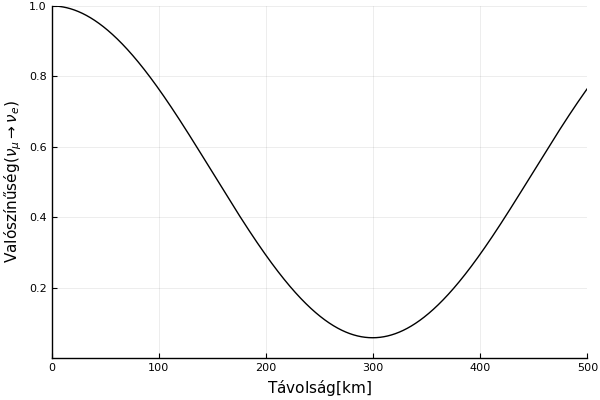

In [36]:
# plot the result
A = sol.u
B = hcat(A...)'

ValuesU1 = B[1:length(B[:,1]), 1]
AbsValuesU1 = broadcast(abs2, ValuesU1)
ValuesU2 = B[1:length(B[:,1]), 2]
AbsValuesU2 = broadcast(abs2, ValuesU2)

Times = sol.t[1:length(B[:,1])]
#Times = sol.t[1:1000]
#plot(Times, ValuesU1)
using PyPlot
pyplot() # Set the backend to PyPlot

plt = Plots.plot(Times, AbsValuesU2, linecolor = :black, xlims = (0,500), ylims = (0.001, 1), legend=false, xlabel = L"\mathrm{Távolság [km]}", ylabel = L"\mathsf{Valószínűség} (\nu_{\mu}\rightarrow\nu_{e}) ")
#PyPlot.display(plt)
#plt = plot(Times, AbsValuesU2,  xlims = (0,1000), ylims = (0, 1), legend=false, xlabel = L"\mathrm{Távolság [km]}", ylabel = L"\mathsf{Valószínűség} (\nu_{\mu}\rightarrow\nu_{e}) ")

#Plots.savefig("test.eps")

0.100000 
0.200000 
0.300000 
0.400000 
0.500000 
0.600000 
0.700000 
0.800000 
0.900000 
1.000000 
1.100000 
1.200000 
1.300000 
1.400000 
1.500000 
1.600000 
1.700000 
1.800000 
1.900000 
2.000000 
2.100000 
2.200000 
2.300000 
2.400000 
2.500000 
2.600000 
2.700000 
2.800000 
2.900000 
3.000000 
0.100000 
0.200000 
0.300000 
0.400000 
0.500000 
0.600000 
0.700000 
0.800000 
0.900000 
1.000000 
1.100000 
1.200000 
1.300000 
1.400000 
1.500000 
1.600000 
1.700000 
1.800000 
1.900000 
2.000000 
2.100000 
2.200000 
2.300000 
2.400000 
2.500000 
2.600000 
2.700000 
2.800000 
2.900000 
3.000000 


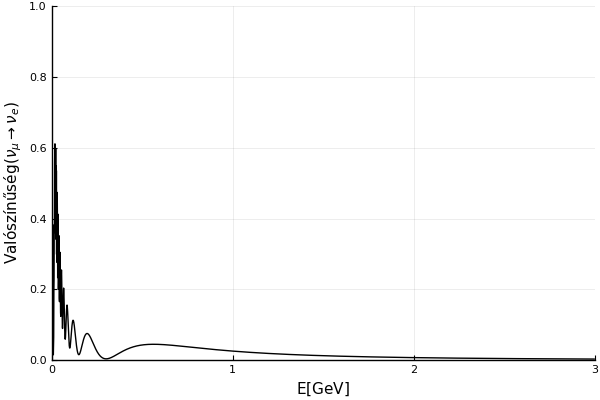

In [65]:
# Loop over energies to recalculate the oscillation at fixed length, 295 km
using Printf

dE = 0.001
nPoints = Int(3.0/dE)
Earray = Any[]
ValueEe = Any[]
ValueEmu = Any[]
ValueEe_c = Any[]
ValueEmu_c = Any[]


Udagger = transpose(U)
Udagger = broadcast(conj, Udagger)
#display(Udagger)
H1 = Mmass*Udagger
#display(U)
#display(H1)
H = U*H1
#display(H)
#Base.print_matrix(stdout, H)


for n=1 : nPoints

    Enu = dE*n + 0.0
    if n % 100 == 0
        @printf("%f \n", Enu)
    end
    
    p=1.0/(2.0*hbarc*1.0e6*1.0e-18)/Enu/1.0e9 + im*0;
    Scale = UniformScaling(p)
    Hmat = Scale*H;


    # Initial value, in flavour basis
    u0 = [0.0+im*0.0,1.0+im*0.0,0.0+im*0.0]
    tspan = (0.0, 295.0) # km
    prob = ODEProblem(Eq,u0,tspan)
    
    sol = solve(prob, Tsit5(), adaptive=false, reltol=1e-9, dt=0.05)

    A = sol.u
    B = hcat(A...)'

    ValuesU1 = B[1:length(B[:,1]), 1]
    AbsValuesU1 = broadcast(abs2, ValuesU1)
    Prob = AbsValuesU1[length(B[:,1])]
    push!(ValueEe,Prob)
    
    ValuesU2 = B[1:length(B[:,1]), 2]
    AbsValuesU2 = broadcast(abs2, ValuesU2)
    Prob = AbsValuesU2[length(B[:,1])]
    push!(ValueEmu,Prob)
    
    push!(Earray,Enu)
   # @printf("%f %f \n", Enu, Prob)
end

# To swap between particle/antiparticle we conjugate the U matrix
U = broadcast(conj, U)
Udagger = transpose(U)
Udagger = broadcast(conj, Udagger)
#display(Udagger)
H1 = Mmass*Udagger
#display(U)
#display(H1)
H = U*H1

for n=1 : nPoints

    Enu = dE*n + 0.0
    if n % 100 == 0
        @printf("%f \n", Enu)
    end
    
    p=1.0/(2.0*hbarc*1.0e6*1.0e-18)/Enu/1.0e9 + im*0;
    Scale = UniformScaling(p)
    Hmat = Scale*H;


    # Initial value, in flavour basis
    u0 = [0.0+im*0.0,1.0+im*0.0,0.0+im*0.0]
    tspan = (0.0, 295.0) # km
    prob = ODEProblem(Eq,u0,tspan)
    
    sol = solve(prob, Tsit5(), adaptive=false, reltol=1e-9, dt=0.05)

    A = sol.u
    B = hcat(A...)'

    ValuesU1 = B[1:length(B[:,1]), 1]
    AbsValuesU1 = broadcast(abs2, ValuesU1)
    Prob = AbsValuesU1[length(B[:,1])]
    push!(ValueEe_c,Prob)
    
    ValuesU2 = B[1:length(B[:,1]), 2]
    AbsValuesU2 = broadcast(abs2, ValuesU2)
    Prob = AbsValuesU2[length(B[:,1])]
    push!(ValueEmu_c,Prob)
    
   # @printf("%f %f \n", Enu, Prob)
end



plt = Plots.plot(Earray, ValueEe, linecolor = :black, xlims = (0,3), ylims = (0, 1), legend=false, xlabel = L"\mathrm{E [GeV]}", ylabel = L"\mathsf{Valószínűség} (\nu_{\mu}\rightarrow\nu_{e}) ")



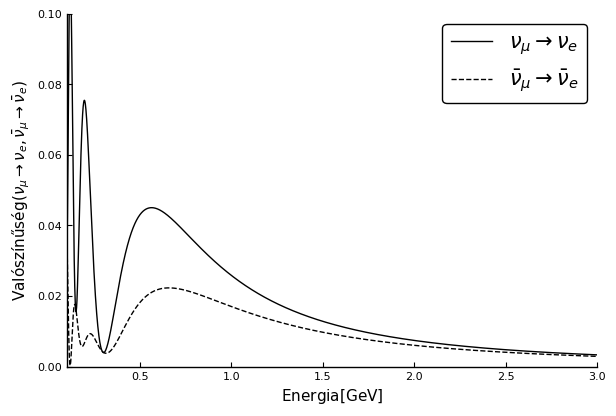

In [79]:
using PyPlot
pyplot() # Set the backend to PyPlot
plt = Plots.plot(Earray, ValueEe, label = L"\nu_{\mu}\rightarrow\nu_e", linecolor = :black, gridalpha = 0.1, gridstyle=:dot, minorgrid=true, minorticks=true, gridlinewidth= 0.05, xlims = (0.1,3), ylims = (0, 0.1), legend=true, legendfontsize=15, xlabel = L"\mathrm{Energia [GeV]}", ylabel = L"\mathsf{Valószínűség} (\nu_{\mu}\rightarrow\nu_{e}, \bar{\nu}_{\mu}\rightarrow\bar{\nu}_{e}) ")

plt2 = Plots.plot!(Earray, ValueEe_c, label = L"\bar{\nu}_{\mu}\rightarrow\bar{\nu}_e", linestyle = :dash, linecolor = :black)
Plots.savefig("test_mue_antimue.eps")




In [ ]:
using PyPlot
pyplot() # Set the backend to PyPlot
plt = Plots.plot(Earray, ValueE, linecolor = :black, gridalpha = 0.1, gridstyle=:dot, minorgrid=true, minorticks=true, gridlinewidth= 0.05, xlims = (0.1,1), ylims = (0, 1), legend=false, xlabel = L"\mathrm{E [GeV]}", ylabel = L"\mathsf{Valószínűség} (\nu_{\mu}\rightarrow\nu_{\mu}) ")
Plots.savefig("test2.eps")

In [ ]:
using Makie
scene = Scene(resolution = (500, 500))
axis = scene[Axis]

In [ ]:
delta=-90.0 / 180.0*PIGREEK;
# Loop over energies to recalculate the oscillation at fixed length, 295 km
using Printf

dE = 0.001
nPoints = Int(10.0/dE)
Earray = Any[]
ValueEe_no = Any[]
ValueEmu_no = Any[]


for n=1 : nPoints

    Enu = dE*n + 0.0
    if n % 1000 == 0
        @printf("%f \n", Enu)
    end
    
    p=1.0/(2.0*hbarc*1.0e6*1.0e-18)/Enu/1.0e9 + im*0;
    Scale = UniformScaling(p)
    Hmat = Scale*H;


    # Initial value, in flavour basis, start with nue
    u0 = [0.0+im*0.0,1.0+im*0.0,0.0+im*0.0]
    #tspan = (0.0, EarthRadius)
    tspan = (0.0, 295.0) # km

    sol = solve(prob, Tsit5(), adaptive=false, reltol=1e-9, dt=0.05)

    A = sol.u
    B = hcat(A...)'

    ValuesU1 = B[1:length(B[:,1]), 1]
    AbsValuesU1 = broadcast(abs2, ValuesU1)
    Prob = AbsValuesU1[length(B[:,1])]
    push!(ValueEe_no,Prob)
    
    ValuesU2 = B[1:length(B[:,1]), 2]
    AbsValuesU2 = broadcast(abs2, ValuesU2)
    Prob = AbsValuesU2[length(B[:,1])]

    push!(ValueEmu_no,Prob)
    push!(Earray,Enu)
   # @printf("%f %f \n", Enu, Prob)
end

plt = Plots.plot(Earray, ValueEe_no, linecolor = :black, xlims = (0,1), ylims = (0, 1), legend=false, xlabel = L"\mathrm{Távolság [km]}", ylabel = L"\mathsf{Valószínűség} (\nu_{\mu}\rightarrow\nu_{e}) ")





In [ ]:
c = exp(0.0-im*1.0)

In [ ]:
c2 = cos(1.0) - im*sin(1.0)